In [2]:
import pandas as pd
df_1 = pd.read_csv('Data/aggregated_spice_price_data_2019_2024.csv')
df_2 = pd.read_csv('Data/aggregated_spice_price_data_Nov2024.csv')
df_1

,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2019-10-31,8476.100000,9156.250000,8854.900000
1,2019-11-01,8362.619048,10080.666667,9385.238095
2,2019-11-02,8228.023256,9744.162791,9147.720930
3,2019-11-03,8620.000000,8881.111111,8768.888889
4,2019-11-04,8185.625000,9976.950000,9199.375000
...,...,...,...,...
1822,2024-10-26,9873.513514,11910.000000,11096.297297
1823,2024-10-27,10366.666667,10916.666667,10635.166667
1824,2024-10-28,10333.593750,11987.500000,11361.281250
1825,2024-10-29,9893.684211,11420.263158,10820.263158


In [5]:
df_1.columns

Index(['Price Date', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)'],
      dtype='object')

In [3]:
df_2

,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2024-11-02,10007.500000,11307.500000,10708.000000
1,2024-11-03,10496.666667,11150.000000,11034.000000
2,2024-11-04,10242.307692,10930.000000,10673.076923
3,2024-11-05,9855.666667,10977.888889,10561.111111
4,2024-11-06,9942.766667,11584.966667,10942.533333
5,2024-11-07,9886.923077,12068.653846,11127.307692
6,2024-11-08,9889.166667,12166.266667,11016.533333
7,2024-11-09,9800.652174,11805.000000,10984.000000
8,2024-11-10,10414.285714,10657.142857,10542.857143
9,2024-11-11,9717.121212,11641.393939,10921.969697


In [6]:
import pandas as pd
import numpy as np

# Filter df_1 to retain only 'Price Date' and 'Modal Price (Rs./Quintal)'
df_univariate = df_1[['Price Date', 'Modal Price (Rs./Quintal)']].copy()

# Sort by 'Price Date' to ensure chronological order
df_univariate = df_univariate.sort_values('Price Date').reset_index(drop=True)

# Define the sequence splitting function
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Define the end of the current sequence
        end_ix = i + n_steps
        # Break if we reach the end of the sequence
        if end_ix > len(sequence) - 1:
            break
        # Define the input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Convert 'Modal Price (Rs./Quintal)' column to a list or array
modal_prices = df_univariate['Modal Price (Rs./Quintal)'].values

# Set the number of time steps (n_steps) for input sequence length
n_steps = 7  # Adjust this based on your forecasting requirements

# Apply the function to split the sequence
X, y = split_sequence(modal_prices, n_steps)

# Display the results
print("Input sequences (X):\n", X)
print("Output values (y):\n", y)


Input sequences (X):
 [[ 8854.9         9385.23809524  9147.72093023 ...  9199.375
   9306.13888889  9317.90277778]
 [ 9385.23809524  9147.72093023  8768.88888889 ...  9306.13888889
   9317.90277778  9256.03225806]
 [ 9147.72093023  8768.88888889  9199.375      ...  9317.90277778
   9256.03225806  9254.57894737]
 ...
 [10748.24242424 10911.4516129  11042.82142857 ... 11163.9
  11096.2972973  10635.16666667]
 [10911.4516129  11042.82142857 11235.05405405 ... 11096.2972973
  10635.16666667 11361.28125   ]
 [11042.82142857 11235.05405405 11163.9        ... 10635.16666667
  11361.28125    10820.26315789]]
Output values (y):
 [ 9256.03225806  9254.57894737  9485.88888889 ... 11361.28125
 10820.26315789 10780.        ]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define a more powerful model
n_features = 1
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output layer for a single output (next day's price)

model.compile(optimizer='adam', loss='mse')

# Display the model architecture
model.summary()


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,451 (591.61 KB)

 Trainable params: 151,451 (591.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
model.fit(X, y, epochs=200, verbose=0)

In [14]:
# Forecast for the next month (30 days)
n_forecast_days = 30

# Get the last sequence from the training data (most recent n_steps days)
last_sequence = X[-1]  # Last sequence used in training
predictions = []

# Predict for the next 30 days
for _ in range(n_forecast_days):
    # Reshape the last sequence for the model (1 sample, n_steps, n_features)
    input_seq = last_sequence.reshape((1, n_steps, n_features))

    # Make a prediction for the next value
    predicted_price = model.predict(input_seq, verbose=0)

    # Append the prediction to the list of predictions
    predictions.append(predicted_price[0, 0])

    # Update the last sequence by replacing the first element with the predicted price
    last_sequence = np.roll(last_sequence, -1)  # Roll the sequence left by one
    last_sequence[-1] = predicted_price  # Insert the new prediction at the end

# Display the forecasted values for the next 30 days
print("Forecast for the next 30 days:", predictions)


Forecast for the next 30 days: [np.float32(7494.7437), np.float32(7503.122), np.float32(7363.8276), np.float32(7132.838), np.float32(6836.677), np.float32(6649.9663), np.float32(5799.526), np.float32(4963.0366), np.float32(4855.2935), np.float32(4669.1064), np.float32(4435.5327), np.float32(4165.5005), np.float32(3851.2432), np.float32(3459.0278), np.float32(3187.2615), np.float32(3056.1748), np.float32(2891.535), np.float32(2707.9), np.float32(2511.5647), np.float32(2315.564), np.float32(2137.2397), np.float32(2002.8291), np.float32(1893.6573), np.float32(1773.7389), np.float32(1650.839), np.float32(1531.7301), np.float32(1422.224), np.float32(1326.3143), np.float32(1244.1133), np.float32(1166.775)]


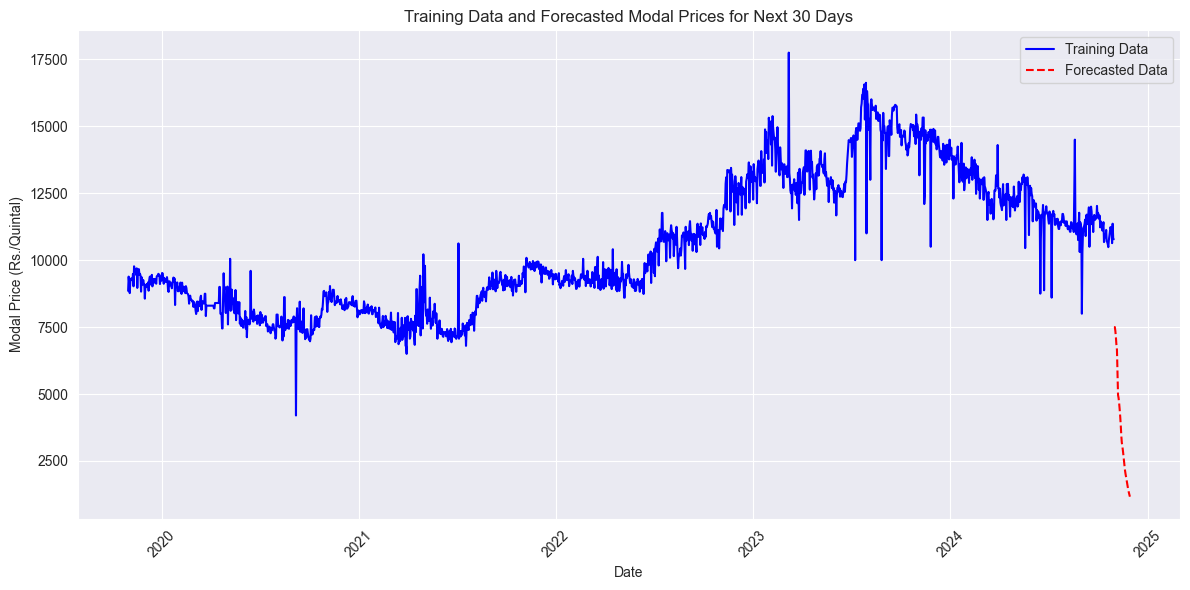

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Price Date' is in datetime format
df_univariate['Price Date'] = pd.to_datetime(df_univariate['Price Date'])

# Get the last training date (the last date of the Price Date column)
last_train_date = df_univariate['Price Date'].iloc[-1]

# Generate forecasted dates for the next 30 days
forecast_dates = pd.date_range(start=last_train_date, periods=n_forecast_days+1, freq='D')[1:]  # Exclude the last training date

# Plotting the training data
plt.figure(figsize=(12, 6))

# Plot the actual training data
plt.plot(df_univariate['Price Date'], df_univariate['Modal Price (Rs./Quintal)'], label='Training Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, predictions, label='Forecasted Data', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Training Data and Forecasted Modal Prices for Next 30 Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Normalize the 'Modal Price (Rs./Quintal)' column
scaler = MinMaxScaler(feature_range=(0, 1))
df_univariate['Normalized Price'] = scaler.fit_transform(df_univariate[['Modal Price (Rs./Quintal)']])

# Convert normalized price values to a list or array
modal_prices = df_univariate['Normalized Price'].values

# Define the sequence splitting function
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 7  # Time steps for input sequence length
X, y = split_sequence(modal_prices, n_steps)

# Reshape X for the LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)))  # Use tanh
model.add(Dropout(0.2))
model.add(LSTM(100, activation='tanh', return_sequences=True))  # Use tanh
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))  # Use tanh
model.add(Dense(1))  # Output layer for single value prediction

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=1)

# Forecast for the next 30 days
n_forecast_days = 30
last_sequence = X[-1]
predictions = []

for _ in range(n_forecast_days):
    input_seq = last_sequence.reshape((1, n_steps, 1))
    predicted_price = model.predict(input_seq, verbose=0)
    predictions.append(predicted_price[0, 0])

    # Update the last sequence with the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

print("Forecast for the next 30 days:", predictions.flatten())


Epoch 1/200


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0725
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 8/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 9/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 10/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 11/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 12/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 13/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 14/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 15/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 16/

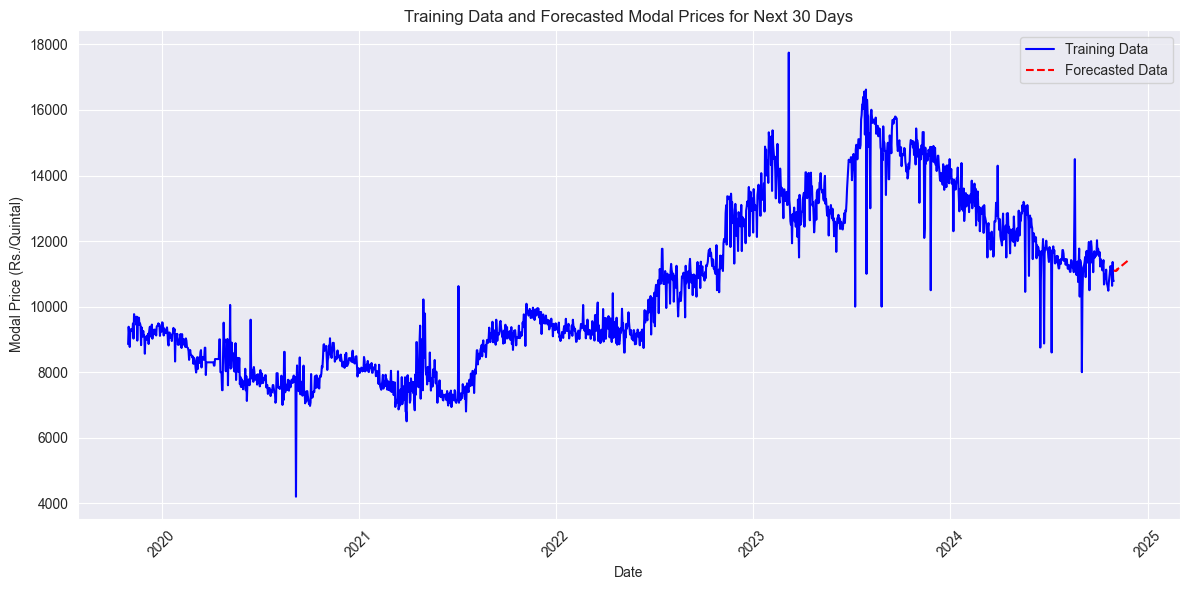

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Price Date' is in datetime format
df_univariate['Price Date'] = pd.to_datetime(df_univariate['Price Date'])

# Get the last training date (the last date of the Price Date column)
last_train_date = df_univariate['Price Date'].iloc[-1]

# Generate forecasted dates for the next 30 days
forecast_dates = pd.date_range(start=last_train_date, periods=n_forecast_days+1, freq='D')[1:]  # Exclude the last training date

# Plotting the training data
plt.figure(figsize=(12, 6))

# Plot the actual training data
plt.plot(df_univariate['Price Date'], df_univariate['Modal Price (Rs./Quintal)'], label='Training Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, predictions, label='Forecasted Data', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Training Data and Forecasted Modal Prices for Next 30 Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Epoch 1/200


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_57320/556955779.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Normalized Price'] = scaler.fit_transform(train_data[['Modal Price (Rs./Quintal)']])
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_57320/556955779.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Normalized Price'] = scaler.transform(test_data[['Modal Price (Rs./Quintal)']])
/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0505 - val_loss: 0.0022
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

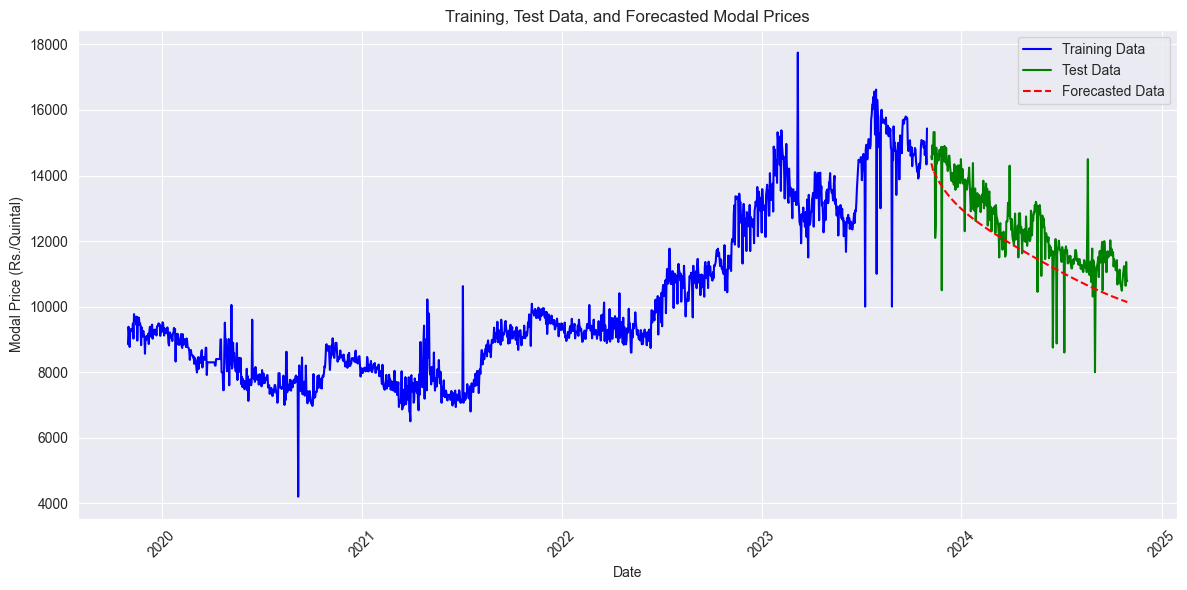

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure 'Price Date' is in datetime format
df_univariate['Price Date'] = pd.to_datetime(df_univariate['Price Date'])

# Split the data into 80% training and 20% testing
train_size = int(len(df_univariate) * 0.8)
train_data = df_univariate[:train_size]
test_data = df_univariate[train_size:]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data['Normalized Price'] = scaler.fit_transform(train_data[['Modal Price (Rs./Quintal)']])
test_data['Normalized Price'] = scaler.transform(test_data[['Modal Price (Rs./Quintal)']])

# Convert the normalized prices to arrays
train_prices = train_data['Normalized Price'].values
test_prices = test_data['Normalized Price'].values

# Define a function to split sequences
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 7  # Time steps for input sequence length
X_train, y_train = split_sequence(train_prices, n_steps)
X_test, y_test = split_sequence(test_prices, n_steps)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build an improved LSTM model
model = Sequential()
model.add(LSTM(150, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.3))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='tanh'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Predict on the test set
test_predictions = []
last_sequence = X_test[0]  # Starting point for prediction

for i in range(len(X_test)):
    input_seq = last_sequence.reshape((1, n_steps, 1))
    predicted_price = model.predict(input_seq, verbose=0)
    test_predictions.append(predicted_price[0, 0])

    # Update the sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price

# Inverse transform the predictions to original scale
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))

# Inverse transform the actual test data to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, test_predictions)
mae = mean_absolute_error(y_test_actual, test_predictions)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data['Price Date'], train_data['Modal Price (Rs./Quintal)'], label='Training Data', color='blue')

# Plot test data
plt.plot(test_data['Price Date'].iloc[n_steps:], test_data['Modal Price (Rs./Quintal)'].iloc[n_steps:], label='Test Data', color='green')

# Plot the forecasted data
plt.plot(test_data['Price Date'].iloc[n_steps:], test_predictions, label='Forecasted Data', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Training, Test Data, and Forecasted Modal Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
n_forecast_days = 365  # One year
last_sequence = X[-1]
predictions = []

for _ in range(n_forecast_days):
    input_seq = last_sequence.reshape((1, n_steps, 1))
    predicted_price = model.predict(input_seq, verbose=0)
    predictions.append(predicted_price[0, 0])

    # Update the last sequence with the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

print("Forecast for the next 365 days:", predictions.flatten())

Forecast for the next 365 days: [11069.989  11101.715  11094.662  11090.901  11090.782  11138.981
 11123.248  11154.551  11169.073  11180.0625 11192.416  11206.361
 11222.016  11234.529  11249.587  11263.278  11276.721  11290.363
 11304.141  11317.916  11331.495  11345.153  11358.669  11372.142
 11385.601  11399.029  11412.415  11425.744  11439.033  11452.269
 11465.46   11478.609  11491.712  11504.767  11517.7705 11530.728
 11543.633  11556.489  11569.296  11582.051  11594.753  11607.403
 11620.     11632.543  11645.029  11657.463  11669.841  11682.162
 11694.426  11706.633  11718.779  11730.869  11742.898  11754.867
 11766.775  11778.623  11790.407  11802.129  11813.788  11825.385
 11836.916  11848.38   11859.782  11871.115  11882.382  11893.582
 11904.716  11915.779  11926.774  11937.701  11948.557  11959.343
 11970.059  11980.702  11991.274  12001.774  12012.201  12022.557
 12032.837  12043.045  12053.179  12063.236  12073.221  12083.13
 12092.963  12102.721  12112.402  12122.008  

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_57320/3733176241.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = predicted_price


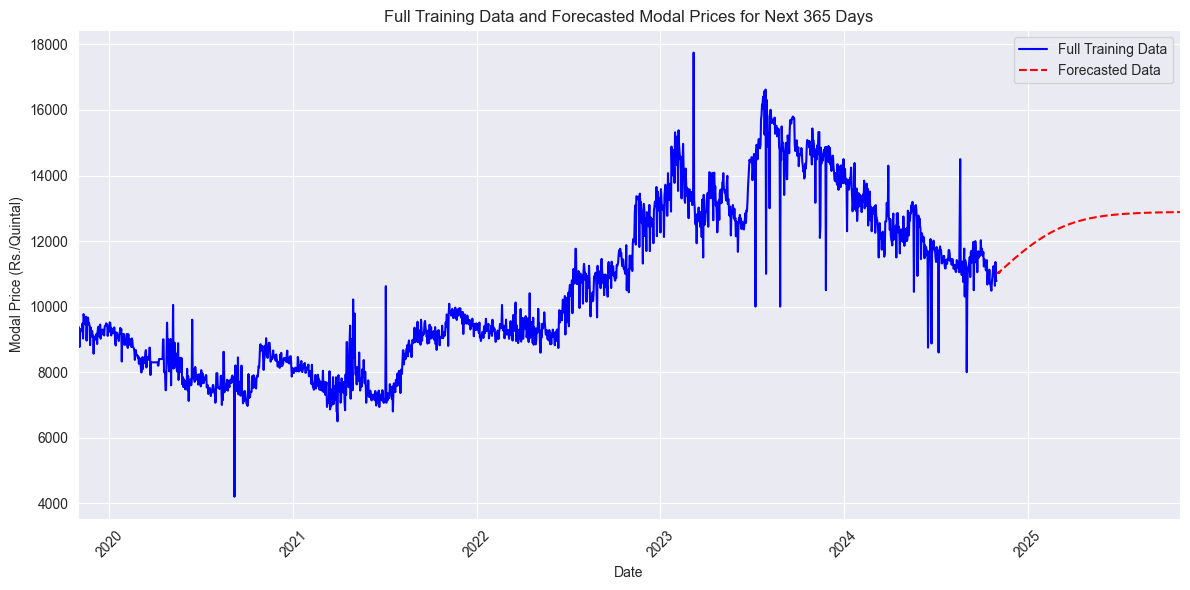

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Price Date' is in datetime format
df_univariate['Price Date'] = pd.to_datetime(df_univariate['Price Date'])

# Get the full training data (not just the last 10%)
df_full_train = df_univariate

# Get the last date of the full training data
last_train_date = df_full_train['Price Date'].iloc[-1]

# Generate forecasted dates starting from the day after the last training date
n_forecast_days = 365  # Forecasting for one year
forecast_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=n_forecast_days, freq='D')

# Ensure you generate 365 predictions (one for each forecast date)
predictions = []

# For forecasting, you need to extend the sequence step by step
last_sequence = df_full_train['Normalized Price'].values[-n_steps:]  # Last 'n_steps' data points from the full training

for _ in range(n_forecast_days):
    input_seq = last_sequence.reshape((1, n_steps, 1))
    predicted_price = model.predict(input_seq, verbose=0)
    predictions.append(predicted_price[0, 0])

    # Update the last sequence with the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))

# Plot the full training data
plt.plot(df_full_train['Price Date'], df_full_train['Modal Price (Rs./Quintal)'], label='Full Training Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, predictions, label='Forecasted Data', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Full Training Data and Forecasted Modal Prices for Next 365 Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust the x-axis to ensure that all dates are displayed
plt.xlim([df_full_train['Price Date'].iloc[0], forecast_dates[-1]])

# Show the plot
plt.tight_layout()
plt.show()
